In [2]:
import json
from urllib.request import urlopen

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from highlight_text import fig_text

from mplsoccer import Bumpy, FontManager, add_image

## Load some fonts
We will use mplsoccer's FontManager to load some fonts from Google Fonts.
We borrowed the FontManager from the excellent
[ridge_map library](https://github.com/ColCarroll/ridge_map).



In [3]:
#font_normal = FontManager("https://raw.githubusercontent.com/google/fonts/main/apache/"
                          #"roboto/Roboto%5Bwdth,wght%5D.ttf")
#font_bold = FontManager("https://raw.githubusercontent.com/google/fonts/main/apache/"
                        #"robotoslab/RobotoSlab%5Bwght%5D.ttf")

import os
import matplotlib.font_manager as fm

font_path = "assets/fonts"
for x in os.listdir(font_path):
    for y in os.listdir(f"{font_path}/{x}"):
        if y.split(".")[-1] == "ttf":
            fm.fontManager.addfont(f"{font_path}/{x}/{y}")
            try:
                fm.FontProperties(weight=y.split("-")[-1].split(".")[0].lower(), fname=y.split("-")[0])
            except Exception:
                continue

## Load Files
We will using these images/data in our examples.
You can find all the images/data [here](https://github.com/andrewRowlinson/mplsoccer-assets).



In [4]:
logo = Image.open(
    urlopen("https://images.sports.gracenote.com/images/lib/basic/sport/football/competition/logo/300/53.png")
)

with open('data/bumpy_standings.json', 'r') as file:
    season_dict = json.load(file)

## Making A Bumpy Chart
A Bump Chart is a special form of a line plot.
This chart is well-suited for exploring changes in rank over time.
Using this chart, you can easily compare the position,
performance or rankings of multiple observations with
respect to each other rather than the actual values itself.
We are going to make use of the weekwise standing data for Serie A 2022/23.



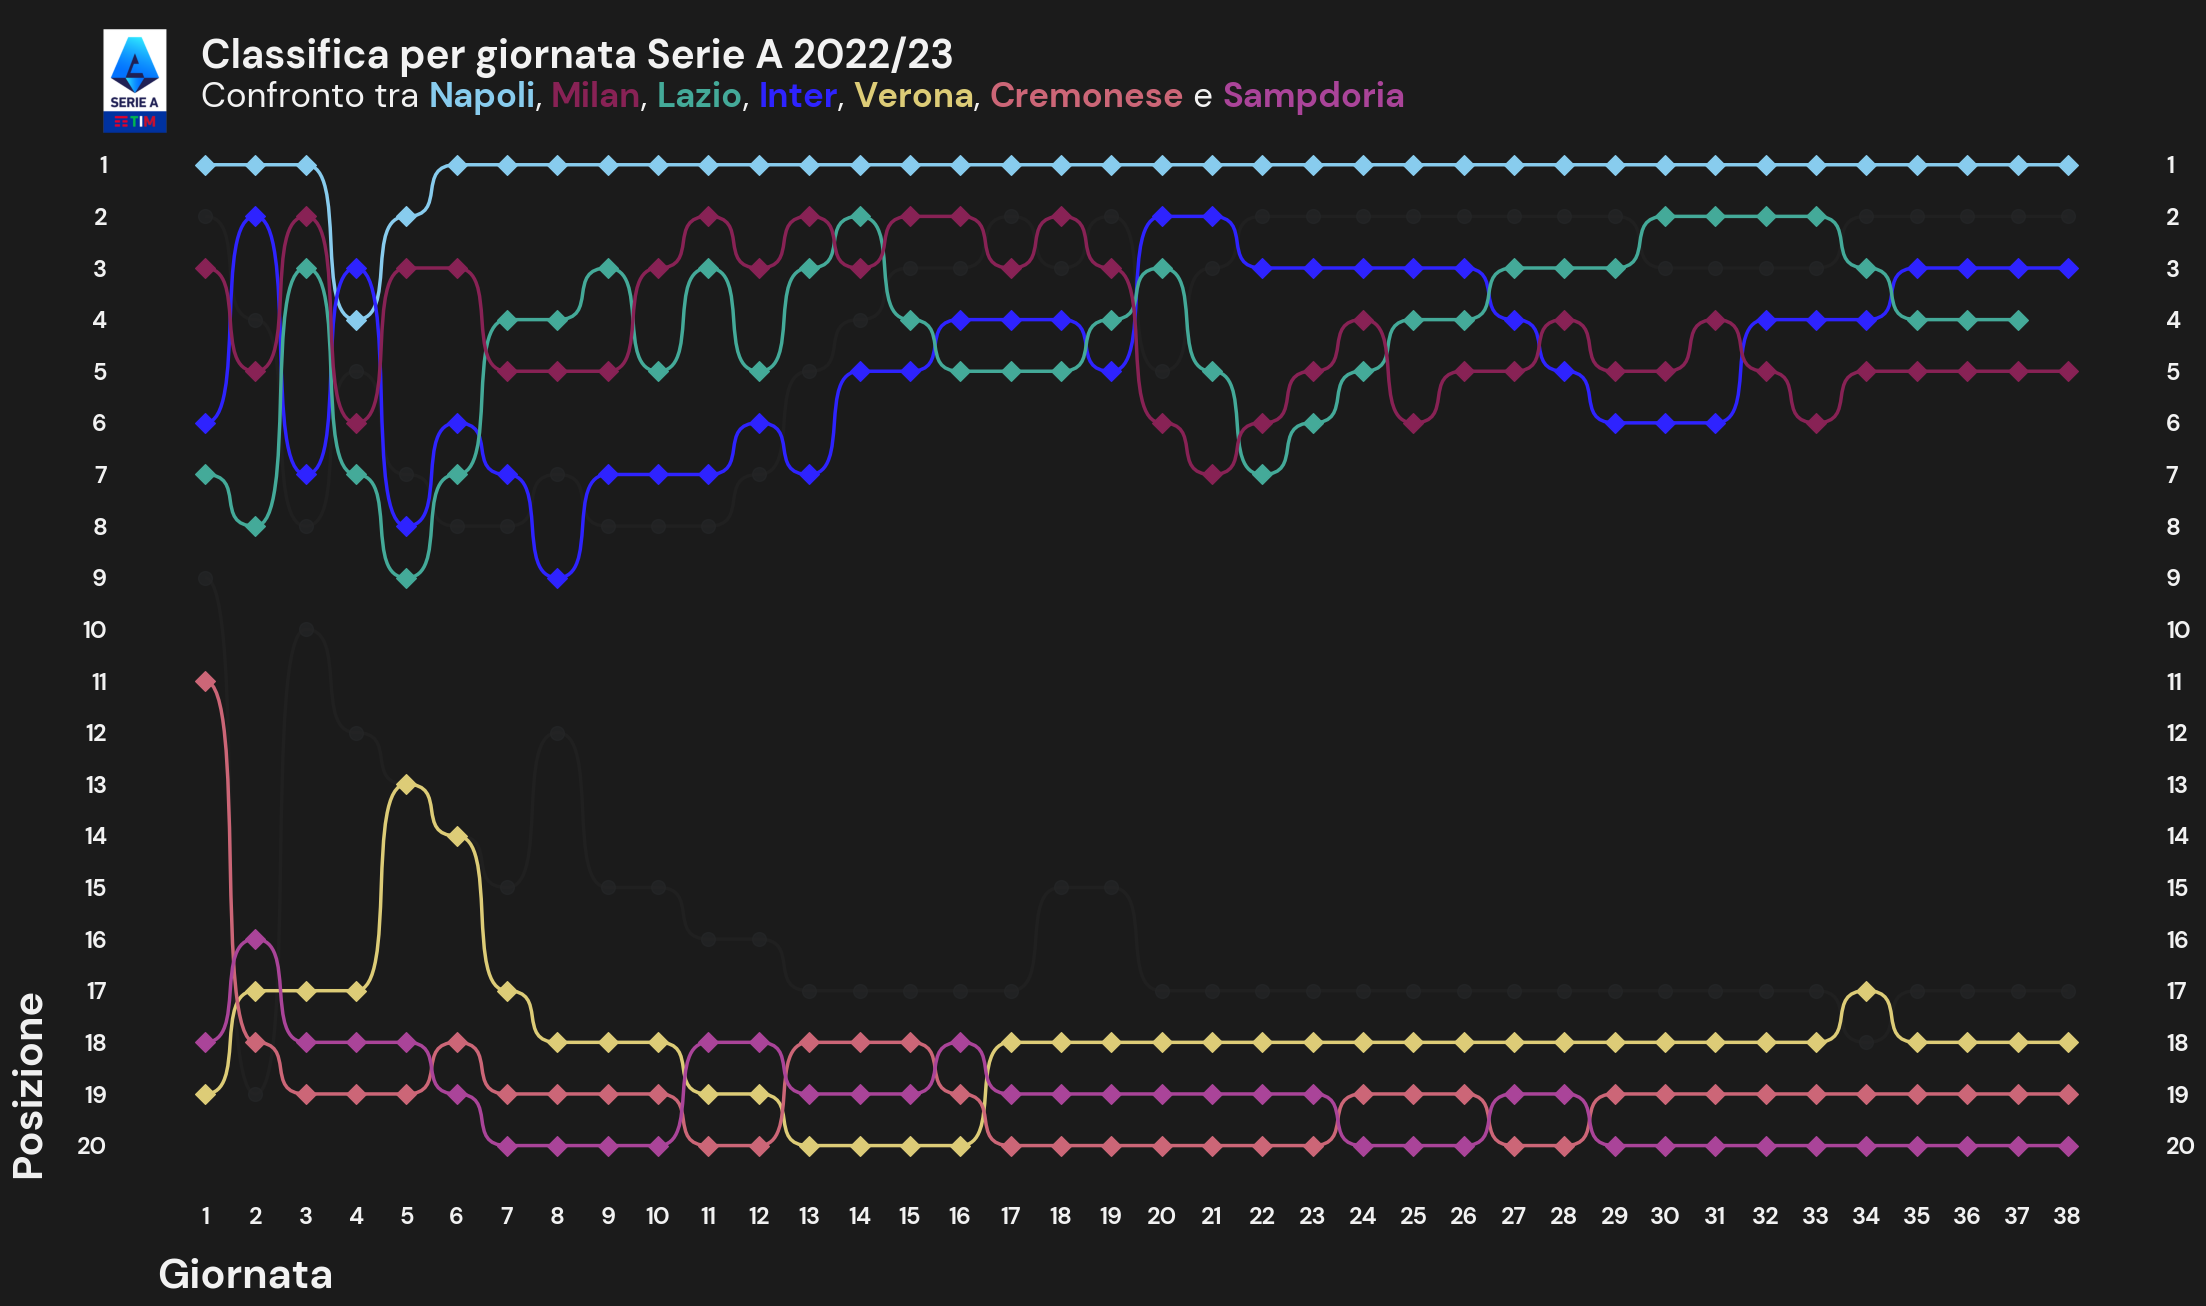

In [8]:
# match-week
match_day = [str(num) for num in range(1, 39)]

# highlight dict --> team to highlight and their corresponding colors
'''
    #"Juventus":     "#000000",
    "Napoli":       "#0072B2",
    "Milan":        "#CC79A7",
    "Lazio":        "#56B4E9",
    "Inter":        "#F0E442",
    #"Spezia":       "#E69F00",
    "Verona":       "#D0C647",#"#E69F00",
    "Cremonese":    "#D55E00",
    "Sampdoria":    "#009E73"
'''
highlight_dict = {
    #"Juventus":
    "Napoli":       "#88CCEE",
    "Milan":        "#882255",
    "Lazio":        "#44AA99",
    "Inter":        "#2E23FF",
    #"Spezia":  
    "Verona":       "#DDCC77",
    "Cremonese":    "#CC6677",
    "Sampdoria":    "#AA4499"
}

# instantiate object
bumpy = Bumpy(
    #background_color="#2b2b2b",
    scatter_color="#282A2C", line_color="#252525",  # scatter and line colors
    #rotate_xticks=90,  # rotate x-ticks by 90 degrees
    ticklabel_size=17, label_size=30,  # ticklable and label font-size
    scatter_primary='D',  # marker to be used
    show_right=True,  # show position on the rightside
    plot_labels=True,  # plot the labels
    alignment_yvalue=0.1,  # y label alignment
    alignment_xvalue=0.065  # x label alignment
)

# plot bumpy chart
fig, ax = bumpy.plot(
    x_list=match_day,  # match-day or match-week
    y_list=np.linspace(1, 20, 20).astype(int),  # position value from 1 to 20
    values=season_dict,  # values having positions for each team
    secondary_alpha=0.5,   # alpha value for non-shaded lines/markers
    highlight_dict=highlight_dict,  # team to be highlighted with their colors
    figsize=(22, 13),  # size of the figure
    x_label='Giornata', y_label='Posizione',  # label name
    ylim=(-0.1, 23),  # y-axis limit
    lw=2.5,   # linewidth of the connecting lines
    fontname="DM Sans", weight = 'bold',   # fontproperties for ticklables/labels
)

# title and subtitle
TITLE = "Classifica per giornata Serie A 2022/23"
SUB_TITLE = "Confronto tra <Napoli>, <Milan>, <Lazio>, <Inter>, <Verona>, <Cremonese> e <Sampdoria>"

# add title
fig.text(0.09, 0.95, TITLE, size=29, color="#F2F2F2", fontname="DM Sans", weight = 'bold')

'''
        highlight_textprops=[
            #{"color": "#000000"},
            {"color": "#0072B2"},
            {"color": "#CC79A7"},
            {"color": "#56B4E9"},
            {"color": "#F0E442"},
            {"color": "#E69F00"},
            {"color": "#D55E00"},
            {"color": "#009E73"}
            ],
'''

# add subtitle
fig_text(
    0.09, 0.94, SUB_TITLE, color="#F2F2F2",
    highlight_textprops=[
        {"color": "#88CCEE", "weight": "bold"},
        {"color": "#882255", "weight": "bold"},
        {"color": "#44AA99", "weight": "bold"},
        {"color": "#2E23FF", "weight": "bold"},
        {"color": "#DDCC77", "weight": "bold"},
        {"color": "#CC6677", "weight": "bold"},
        {"color": "#AA4499", "weight": "bold"}
    ],
    size=25, fig=fig, fontname="DM Sans"
)


# add image
fig = add_image(
     logo,
     fig,  # figure
     0.02, 0.9,  # left and bottom dimensions
     0.08, 0.08  # height and width values
)

# if space is left in the plot use this
plt.tight_layout(pad=0.5)

plt.savefig(
	"figures/SerieA_Weekly_Standings_Darker.png",
	dpi = 600,
	bbox_inches="tight",
    edgecolor="none",
	transparent = False
)

## Flip The y-axis
If you want to plot positions from the bottom, i.e. the 1st position will
be at the bottom and the 20th position will be at the top. You can do it easily.
You just have to pass ``upside_down=True`` inside ``plot`` function.



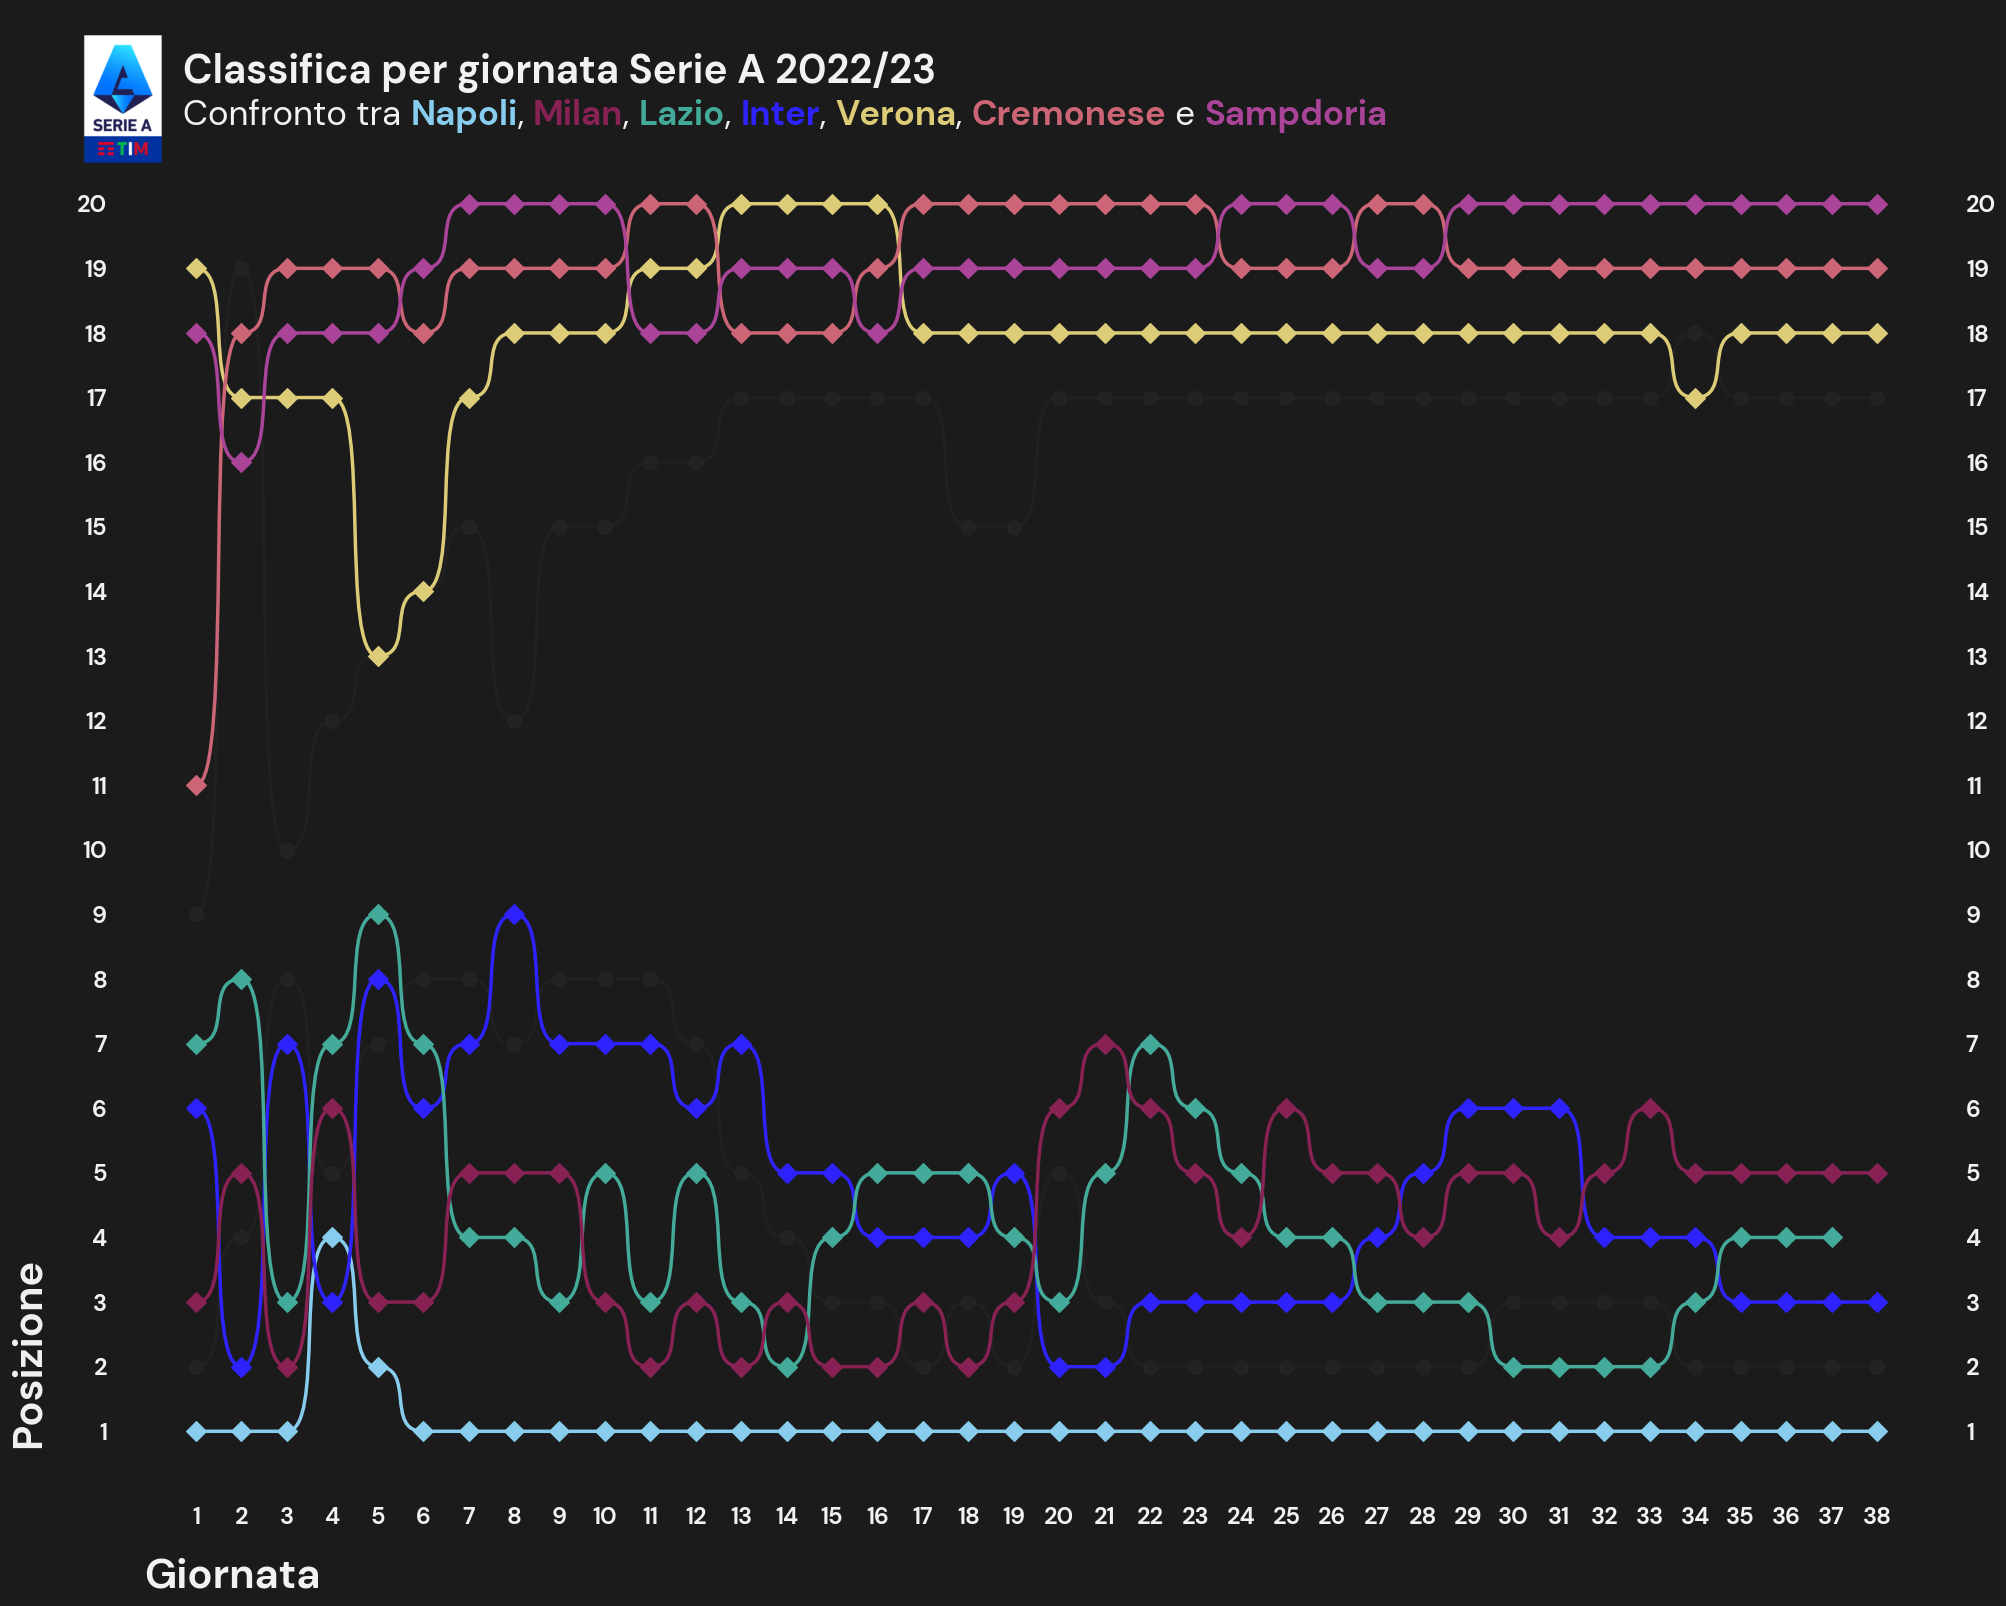

In [18]:
# instantiate object
bumpy = Bumpy(
    scatter_color="#282A2C", line_color="#252525",  # scatter and line colors
    #rotate_xticks=90,  # rotate x-ticks by 90 degrees
    ticklabel_size=17, label_size=30,  # ticklable and label font-size
    scatter_primary='D',  # marker to be used
    show_right=True,  # show position on the rightside
    plot_labels=True,  # plot the labels
    alignment_yvalue=0.1,  # y label alignment
    alignment_xvalue=0.065,  # x label alignment
)

# plot bumpy chart
fig, ax = bumpy.plot(
    x_list=match_day,  # match-day or match-week
    y_list=np.linspace(1, 20, 20).astype(int),  # position value from 1 to 20
    values=season_dict,  # values having positions for each team
    secondary_alpha=0.5,   # alpha value for non-shaded lines/markers
    highlight_dict=highlight_dict,  # team to be highlighted with their colors
    figsize=(20, 16),  # size of the figure
    x_label='Giornata', y_label='Posizione',  # label name
    ylim=(-0.1, 23),  # y-axis limit
    lw=2.5,   # linewidth of the connecting lines
    upside_down=True,    # <--- to flip the y-axis
    fontname="DM Sans", weight = 'bold',   # fontproperties for ticklables/labels
)

# title and subtitle
TITLE = "Classifica per giornata Serie A 2022/23"
SUB_TITLE = "Confronto tra <Napoli>, <Milan>, <Lazio>, <Inter>, <Verona>, <Cremonese> e <Sampdoria>"

# add title
fig.text(0.09, 0.95, TITLE, size=29, color="#F2F2F2", fontname="DM Sans", weight = 'bold')

'''
        highlight_textprops=[
            #{"color": "#000000"},
            {"color": "#0072B2"},
            {"color": "#CC79A7"},
            {"color": "#56B4E9"},
            {"color": "#F0E442"},
            {"color": "#E69F00"},
            {"color": "#D55E00"},
            {"color": "#009E73"}
            ],
'''

# add subtitle
fig_text(
    0.09, 0.94, SUB_TITLE, color="#F2F2F2",
    highlight_textprops=[
        {"color": "#88CCEE", "weight": "bold"},
        {"color": "#882255", "weight": "bold"},
        {"color": "#44AA99", "weight": "bold"},
        {"color": "#2E23FF", "weight": "bold"},
        {"color": "#DDCC77", "weight": "bold"},
        {"color": "#CC6677", "weight": "bold"},
        {"color": "#AA4499", "weight": "bold"}
    ],
    size=25, fig=fig, fontname="DM Sans"
)


# add image
fig = add_image(
     logo,
     fig,  # figure
     0.02, 0.9,  # left and bottom dimensions
     0.08, 0.08  # height and width values
)

# if space is left in the plot use this
plt.tight_layout(pad=0.5)

## Light Theme
``background_color``, ``scatter_color``, ``label_color``, and ``line_color`` arguments
to change the whole theme of the plot. Light-theme
bumpy chart using ``mplsoccer``.
Below you can also use ``scatter_points``, ``scatter_primary``, and ``scatter_size``
arguments inside ``Bumpy`` method to change markers and their sizes.



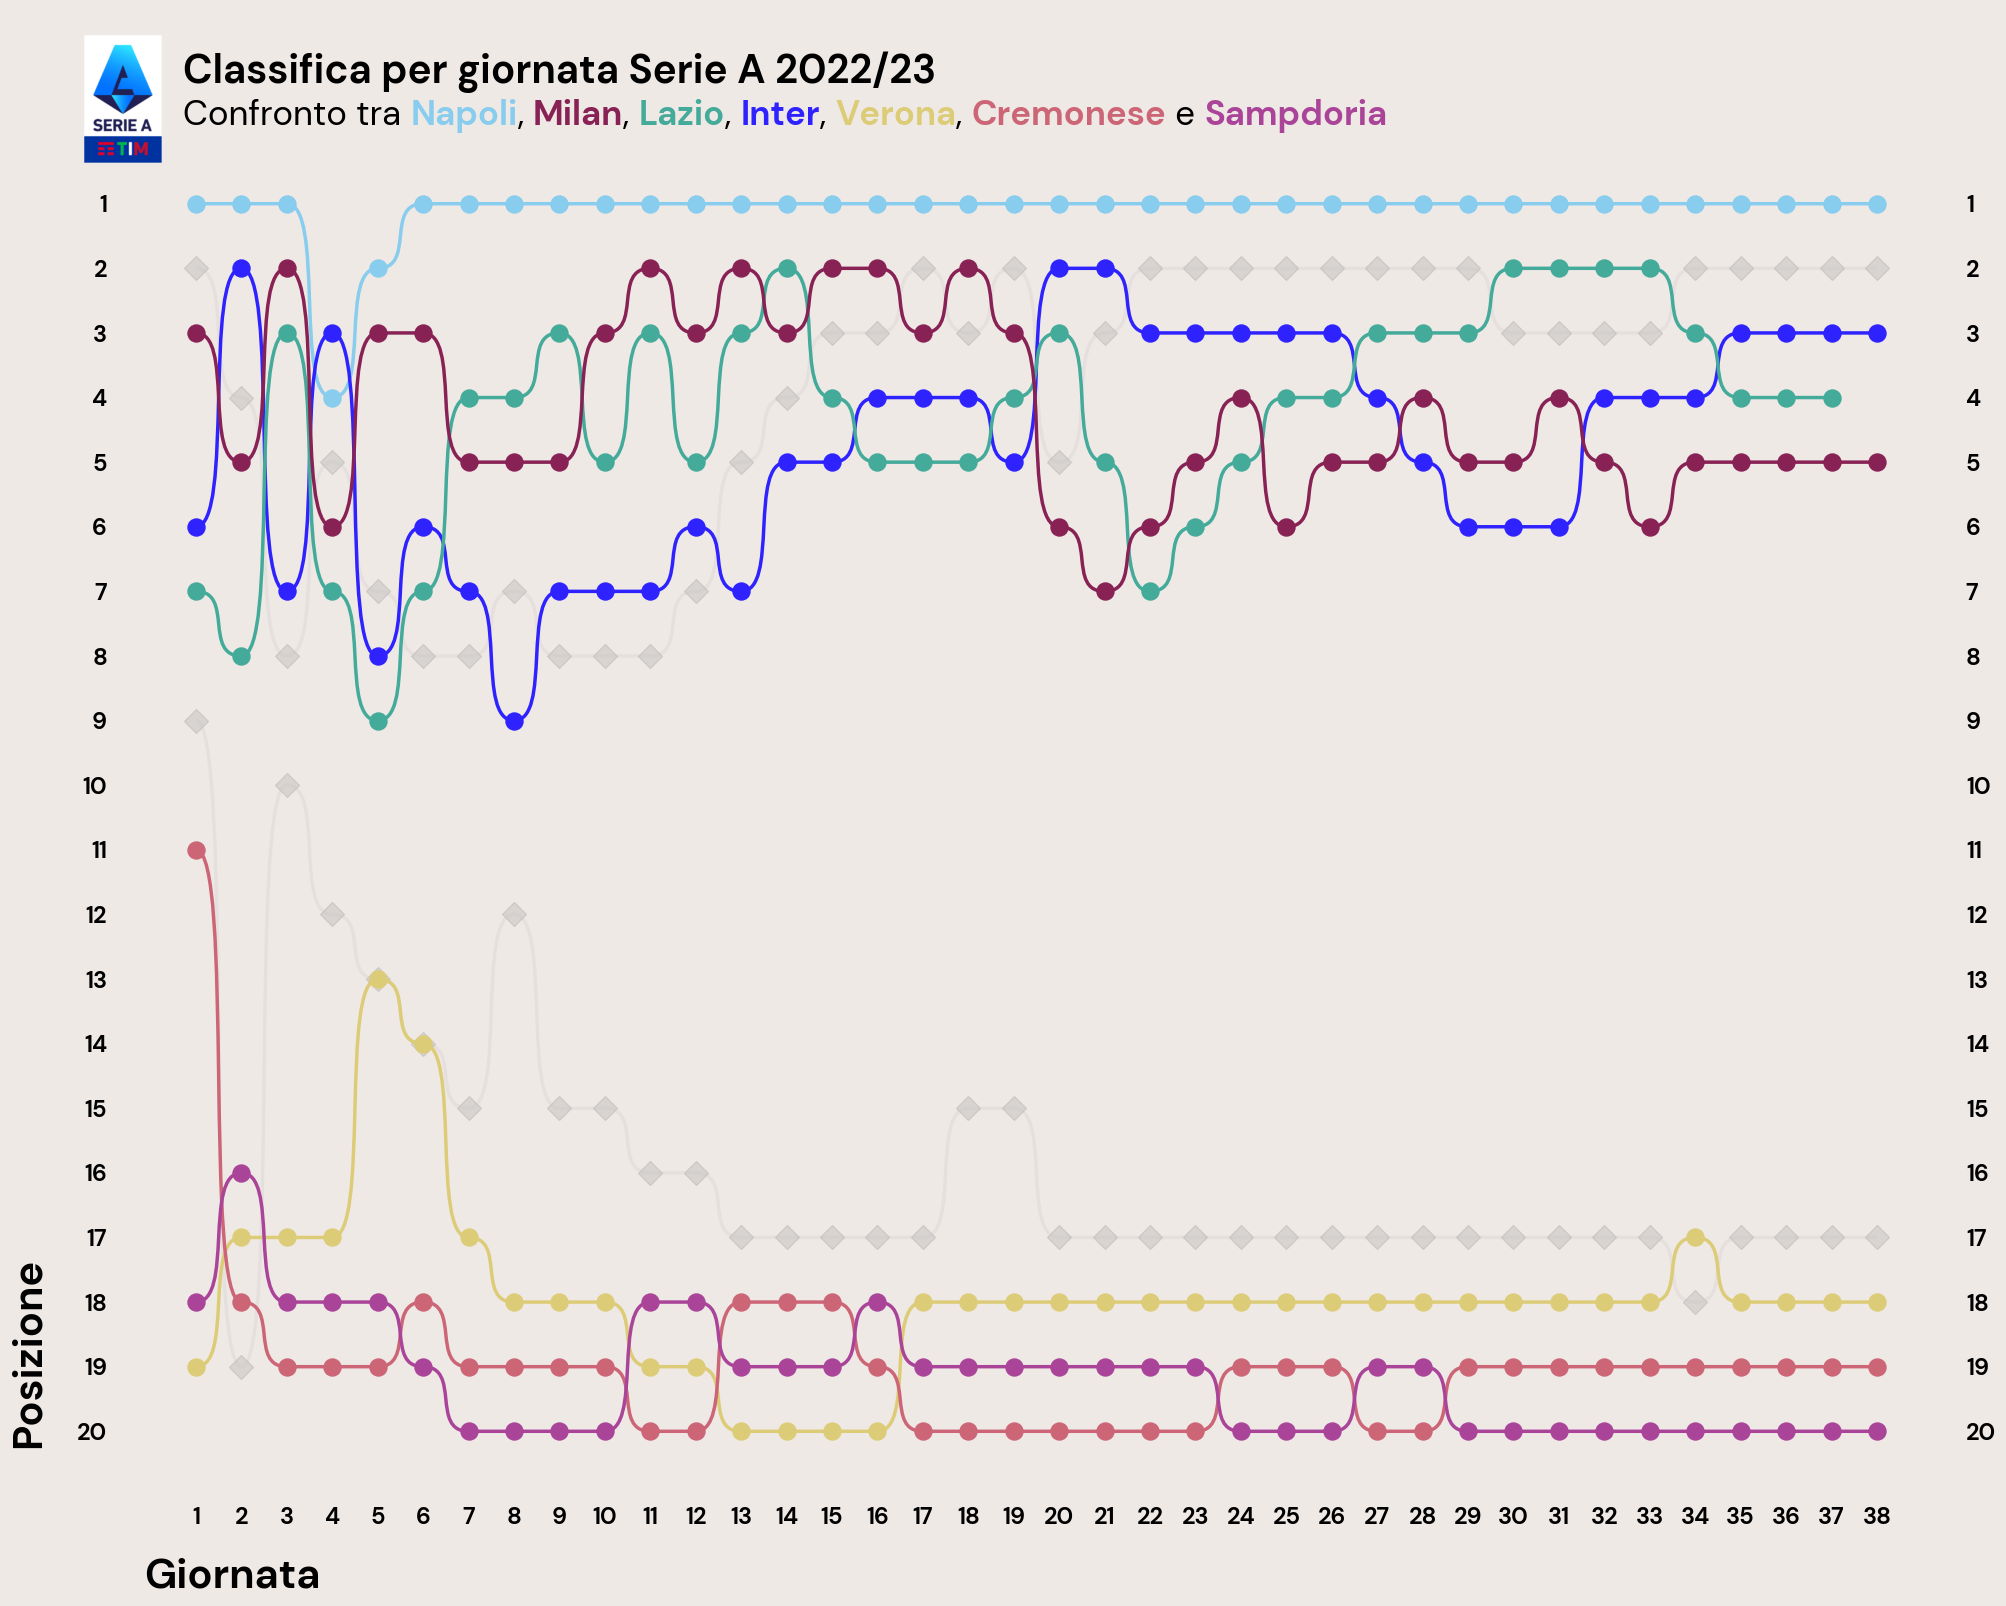

In [19]:
# highlight dict --> team to highlight and their corresponding colors
highlight_dict = {
    #"Juventus":
    "Napoli":       "#88CCEE",
    "Milan":        "#882255",
    "Lazio":        "#44AA99",
    "Inter":        "#2E23FF",
    #"Spezia":  
    "Verona":       "#DDCC77",
    "Cremonese":    "#CC6677",
    "Sampdoria":    "#AA4499"
}

# instantiate object
bumpy = Bumpy(
    background_color="#EFE9E6", scatter_color="#808080",
    label_color="#000000", line_color="#C0C0C0",
    #rotate_xticks=90,  # rotate x-ticks by 90 degrees
    ticklabel_size=17, label_size=30,  # ticklable and label font-size
    scatter_points='D',   # other markers
    scatter_primary='o',  # marker to be used for teams
    scatter_size=150,   # size of the marker
    show_right=True,  # show position on the rightside
    plot_labels=True,  # plot the labels
    alignment_yvalue=0.1,  # y label alignment
    alignment_xvalue=0.065  # x label alignment
)

# plot bumpy chart
fig, ax = bumpy.plot(
    x_list=match_day,  # match-day or match-week
    y_list=np.linspace(1, 20, 20).astype(int),  # position value from 1 to 20
    values=season_dict,  # values having positions for each team
    secondary_alpha=0.2,   # alpha value for non-shaded lines/markers
    highlight_dict=highlight_dict,  # team to be highlighted with their colors
    figsize=(20, 16),  # size of the figure
    x_label='Giornata', y_label='Posizione',  # label name
    ylim=(-0.1, 23),  # y-axis limit
    lw=2.5,   # linewidth of the connecting lines
    fontname="DM Sans", weight = 'bold',   # fontproperties for ticklables/labels
)

# title and subtitle
TITLE = "Classifica per giornata Serie A 2022/23"
SUB_TITLE = "Confronto tra <Napoli>, <Milan>, <Lazio>, <Inter>, <Verona>, <Cremonese> e <Sampdoria>"

# add title
fig.text(0.09, 0.95, TITLE, size=29, color="black", fontname="DM Sans", weight = 'bold')

'''
        highlight_textprops=[
            #{"color": "#000000"},
            {"color": "#0072B2"},
            {"color": "#CC79A7"},
            {"color": "#56B4E9"},
            {"color": "#F0E442"},
            {"color": "#E69F00"},
            {"color": "#D55E00"},
            {"color": "#009E73"}
            ],
'''

# add subtitle
fig_text(
    0.09, 0.94, SUB_TITLE, color="black",
    highlight_textprops=[
        {"color": "#88CCEE", "weight": "bold"},
        {"color": "#882255", "weight": "bold"},
        {"color": "#44AA99", "weight": "bold"},
        {"color": "#2E23FF", "weight": "bold"},
        {"color": "#DDCC77", "weight": "bold"},
        {"color": "#CC6677", "weight": "bold"},
        {"color": "#AA4499", "weight": "bold"}
    ],
    size=25, fig=fig, fontname="DM Sans"
)

# add image
fig = add_image(
     logo,
     fig,  # figure
     0.02, 0.9,  # left and bottom dimensions
     0.08, 0.08  # height and width values
)
# if space is left in the plot use this
plt.tight_layout(pad=0.5)


plt.savefig(
	"figures/SerieA_Weekly_Standings.png",
	dpi = 600,
	facecolor = "#EFE9E6",
	bbox_inches="tight",
    edgecolor="none",
	transparent = False
)